# Import Liberies

In [90]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Load Data

In [91]:
df = pd.read_csv("/home/ellah/Desktop/iris.csv/Iris.csv",sep=",")
df.columns 

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Categogry

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

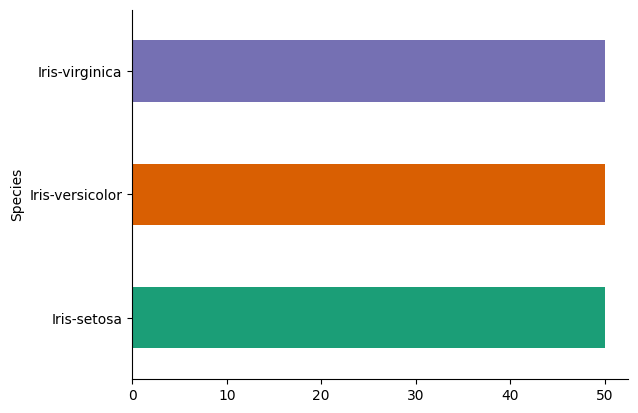

In [92]:
df.groupby('Species').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

df.groupby('Species').size()

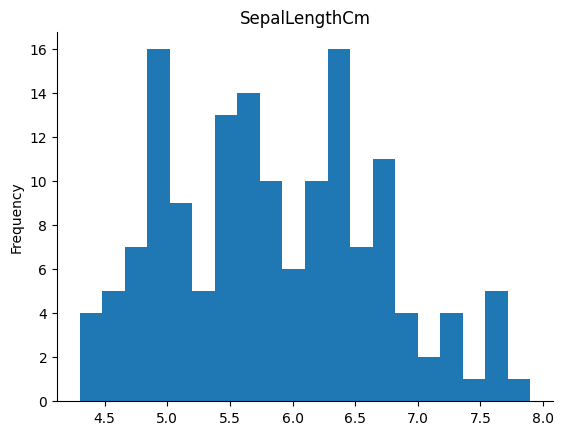

In [93]:
df['SepalLengthCm'].plot(kind='hist', bins=20, title='SepalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Explore data

In [94]:
print (df.shape)

print (df.head(10))
print (df.tail())
print(df.describe())
print(df.groupby('Species').size())

(150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146 

# visualization

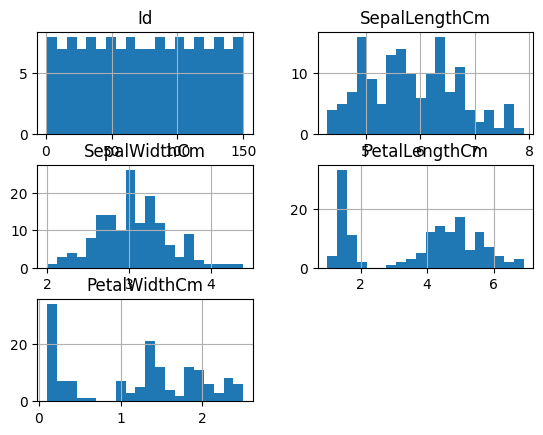

In [95]:
df.hist(bins=20)
plt.show()

# missing values

In [96]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# predicting the data

In [97]:
array = df.values
X = array[:,0:4]
y = array[:,4]

#print (X)
#print (y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Model creation abd training

In [98]:
Y_train = Y_train.astype(int)

In [99]:
model = LogisticRegression(solver='lbfgs', multi_class='auto') 
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_results

model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'mult

In [100]:
Y_validation = Y_validation.astype(int)

print (Y_validation)
print (predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1]
[0 1 1 0 2 1 1 0 0 2 1 0 1 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 1]
0.9
[[11  0  0]
 [ 0 14  1]
 [ 0  2  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.93      0.90        15
           2       0.67      0.50      0.57         4

    accuracy                           0.90        30
   macro avg       0.85      0.81      0.82        30
weighted avg       0.89      0.90      0.89        30



# exploring more models

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



models = []
print (models)

print (models)
models.append(('LDA', RandomForestClassifier()))
print (models)

models.append(('KNN', KNeighborsClassifier()))
print (models)
models.append(('CART-default', DecisionTreeClassifier()))
print (models)
models.append(('CART-customized', DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50)))
print (models)






results = []
names = []



for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('=======================')
	print(name)
	print(cv_results)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

[]
[]
[('LDA', RandomForestClassifier())]
[('LDA', RandomForestClassifier()), ('KNN', KNeighborsClassifier())]
[('LDA', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('CART-default', DecisionTreeClassifier())]
[('LDA', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('CART-default', DecisionTreeClassifier()), ('CART-customized', DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50))]
LDA
[0.75       0.91666667 0.83333333 0.91666667 0.91666667 0.75
 0.83333333 0.75       0.83333333 1.        ]
LDA: 0.850000 (0.081650)
KNN
[0.75       0.91666667 0.75       0.91666667 0.83333333 0.83333333
 0.83333333 0.66666667 0.83333333 0.75      ]
KNN: 0.808333 (0.075000)
CART-default
[0.91666667 0.91666667 0.83333333 0.91666667 1.         0.91666667
 0.83333333 0.58333333 0.83333333 0.91666667]
CART-default: 0.866667 (0.106719)
CART-customized
[0.83333333 0.91666667 0.83333333 0.91666667 0.91666667 0.83333333
 0.83333333 0.66666667 0.83333333 1.        ]
CART-custom

# Predicting using Decision Tree

In [102]:
model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[11  0  0]
 [ 0 14  1]
 [ 0  1  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.75      0.75      0.75         4

    accuracy                           0.93        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.93      0.93      0.93        30



# predicting using KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors as needed
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(Y_validation, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_validation, predictions))
print("Classification Report:\n", classification_report(Y_validation, predictions))


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0 14  1]
 [ 0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.75      0.75      0.75         4

    accuracy                           0.93        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.93      0.93      0.93        30



# PREDICTING USING RANDOM FOREST

In [104]:
model = RandomForestClassifier(criterion='entropy', max_leaf_nodes=50)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[11  0  0]
 [ 0 14  1]
 [ 0  1  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.75      0.75      0.75         4

    accuracy                           0.93        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.93      0.93      0.93        30

